In [1]:
# Import libraries

from matplotlib.ticker import MultipleLocator, FixedLocator, LogLocator, NullFormatter, ScalarFormatter
from matplotlib.pyplot import MultipleLocator
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from datetime import date, datetime, time, timedelta
import os
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime, pytz
import re
import matplotlib.font_manager
import statsmodels.api as sm


In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'libertine'

In [3]:
file_path = "/Users/yzang/Documents/Slurm data/Clean data/"
slurm_data = pd.read_csv(file_path + "slurm_data_cleaned.csv", index_col = [0])
ml_data = pd.read_csv(file_path + "ml_data_cleaned.csv", index_col = [0])
generic_data = pd.read_csv(file_path + "generic_data_cleaned.csv", index_col = [0])
course_data = pd.read_csv(file_path + "course_data_cleaned.csv", index_col = [0])


In [4]:
column_headers = list(slurm_data.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['JobID', 'GID', 'UID', 'Partition', 'Submit', 'Start', 'End', 'ElapsedRaw', 'CPUTimeRAW', 'NCPUS', 'NNode', 'State', 'AllocCPUS', 'AllocNode', 'NTask', 'ReqCPUS', 'ave_cpu_freq', 'ave_disk_read', 'ave_disk_write', 'max_disk_read', 'max_disk_write', 'max_vm_size', 'req_mem', 'node_list', 'submit_hour_of_day', 'submit_day_of_week', 'sumbit_day_of_month', 'submit_date', 'waiting_time', 'running_time', 'node_type']


In [5]:
slurm_data

,JobID,GID,UID,Partition,Submit,Start,End,ElapsedRaw,CPUTimeRAW,NCPUS,...,max_vm_size,req_mem,node_list,submit_hour_of_day,submit_day_of_week,sumbit_day_of_month,submit_date,waiting_time,running_time,node_type
0,8611429_9,42542.0,42783.0,normal,2021-12-25 17:55:07,2021-12-27 09:21:31,2022-01-01 09:21:51,432020,6912320,16,...,NaN,92160.0,{'r10n31'},17,5,25,2021-12-25,141984.0,432020.0,1
1,8611429_10,42542.0,42783.0,normal,2021-12-25 17:55:07,2021-12-27 09:24:32,2022-01-01 09:24:51,432019,6912304,16,...,NaN,92160.0,{'r14n23'},17,5,25,2021-12-25,142165.0,432019.0,1
2,8612272_31,55571.0,56006.0,normal,2021-12-26 18:11:18,2021-12-27 00:06:31,2022-01-01 00:06:50,432019,6912304,16,...,NaN,92160.0,{'r13n5'},18,6,26,2021-12-26,21313.0,432019.0,1
3,8612272_33,55571.0,56006.0,normal,2021-12-26 18:11:18,2021-12-27 00:06:43,2022-01-01 00:06:50,432007,6912112,16,...,NaN,92160.0,{'r14n27'},18,6,26,2021-12-26,21325.0,432007.0,1
4,8612272_34,55571.0,56006.0,normal,2021-12-26 18:11:18,2021-12-27 00:06:43,2022-01-01 00:06:50,432007,6912112,16,...,NaN,92160.0,{'r15n12'},18,6,26,2021-12-26,21325.0,432007.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161576,10784780.0,NaN,NaN,NaN,2023-02-28 23:32:55,2023-02-28 23:32:55,2023-02-28 23:33:08,13,78,6,...,0.0,NaN,{'r28n2'},23,1,28,2023-02-28,0.0,13.0,0
2161577,10784799,59194.0,59671.0,gpu_titanrtx_shared,2023-02-28 23:46:12,2023-02-28 23:46:12,2023-02-28 23:46:23,11,66,6,...,NaN,32000.0,{'r28n2'},23,1,28,2023-02-28,0.0,11.0,0
2161578,10784799.ba+,NaN,NaN,NaN,2023-02-28 23:46:12,2023-02-28 23:46:12,2023-02-28 23:46:23,11,66,6,...,0.0,NaN,{'r28n2'},23,1,28,2023-02-28,0.0,11.0,0
2161579,10784799.ex+,NaN,NaN,NaN,2023-02-28 23:46:12,2023-02-28 23:46:12,2023-02-28 23:46:23,11,66,6,...,0.0,NaN,{'r28n2'},23,1,28,2023-02-28,0.0,11.0,0


In [6]:
slurm_data['elapsedraw'] = slurm_data['ElapsedRaw']/3600.0
ml_data['elapsedraw'] = ml_data['ElapsedRaw']/3600.0
generic_data['elapsedraw'] = generic_data['ElapsedRaw']/3600.0
course_data['elapsedraw'] = course_data['ElapsedRaw']/3600.0

In [7]:
# divide jobs into: generic completed, generic failed, ml completed, ml failed, course completed, and course failed

ge_completed = generic_data[generic_data['State'] == 'COMPLETED']
ge_failed = generic_data[generic_data['State'] == 'FAILED']
ml_completed = ml_data[ml_data['State'] == 'COMPLETED']
ml_failed = ml_data[ml_data['State'] == 'FAILED']
cs_completed = course_data[course_data['State'] == 'COMPLETED']
cs_failed = course_data[course_data['State'] == 'FAILED']


In [8]:
slurm_data['Partition'].unique()

array(['normal', 'gpu_titan+', 'shared', 'gpu', 'gpu_shared',
       'fat_soil_+', 'gpu_share+', 'hared_ju+', 'short', 'gpu_short',
       'sw', 'fat', 'gpu_titanrtx_shared', 'gpu_titanrtx_short',
       'gpu_titanrtx', 'fat_soil_shared', 'gpu_shared_jupyter',
       'shared_jupyter', 'gpu_titanrtx_shared_course',
       'gpu_shared_course', 'shared_52c_384g', nan], dtype=object)

In [9]:
slurm_data['Partition'].value_counts(normalize = True) * 100

normal                        60.381969
shared                        25.579342
gpu_shared                     4.599944
gpu_titanrtx_shared            2.794069
gpu_shared_course              2.001852
gpu_titan+                     0.924422
gpu_titanrtx                   0.646291
gpu                            0.525565
shared_52c_384g                0.499220
gpu_titanrtx_shared_course     0.494427
fat_soil_shared                0.310017
gpu_short                      0.270875
gpu_share+                     0.198219
sw                             0.193249
shared_jupyter                 0.127675
fat                            0.115272
gpu_titanrtx_short             0.109995
short                          0.074810
fat_soil_+                     0.068917
gpu_shared_jupyter             0.068741
hared_ju+                      0.015129
Name: Partition, dtype: float64

In [10]:
round(slurm_data.isnull().mean()*100,2) 

JobID                   0.00
GID                     6.27
UID                     6.27
Partition               6.27
Submit                  0.00
Start                   0.00
End                     0.00
ElapsedRaw              0.00
CPUTimeRAW              0.00
NCPUS                   0.00
NNode                   0.00
State                   0.00
AllocCPUS               0.00
AllocNode               0.00
NTask                  93.73
ReqCPUS                 0.00
ave_cpu_freq           93.73
ave_disk_read          93.79
ave_disk_write         93.79
max_disk_read          93.79
max_disk_write         93.79
max_vm_size            93.79
req_mem                 6.27
node_list               0.00
submit_hour_of_day      0.00
submit_day_of_week      0.00
sumbit_day_of_month     0.00
submit_date             0.00
waiting_time            0.00
running_time            0.00
node_type               0.00
elapsedraw              0.00
dtype: float64

In [11]:
print('Generic jobs:\n', generic_data['State'].value_counts(), '\n')
print('ML jobs:\n', ml_data['State'].value_counts(), '\n')
print('Course jobs:\n', course_data['State'].value_counts(), '\n')

Generic jobs:
 COMPLETED        1610317
FAILED            357057
CANCELLED         122400
TIMEOUT            52194
OUT_OF_MEMORY      12610
NODE_FAIL             43
REQUEUED               3
Name: State, dtype: int64 

ML jobs:
 COMPLETED        158291
FAILED            67103
CANCELLED         29936
TIMEOUT           14974
OUT_OF_MEMORY       780
NODE_FAIL            13
REQUEUED              3
Name: State, dtype: int64 

Course jobs:
 COMPLETED        22656
FAILED           21146
CANCELLED         7585
TIMEOUT           2042
OUT_OF_MEMORY      102
NODE_FAIL            6
Name: State, dtype: int64 



['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_MEMORY', 'NODE_FAIL'] 
 [0.5838841755809664, 0.24752120988565104, 0.11042419771302102, 0.05523423091110291, 0.0028771670970121725, 4.795278495020288e-05]
['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_MEMORY', 'NODE_FAIL'] 
 [0.7473772686092794, 0.1657166169132062, 0.05680805560506148, 0.02422418018178578, 0.005852529258005109, 1.9957078357987286e-05]
['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_MEMORY', 'NODE_FAIL'] 
 [0.42318396622896315, 0.39497917328202925, 0.14167771821357192, 0.038141845826251006, 0.0019052244242299717, 0.00011207202495470422]


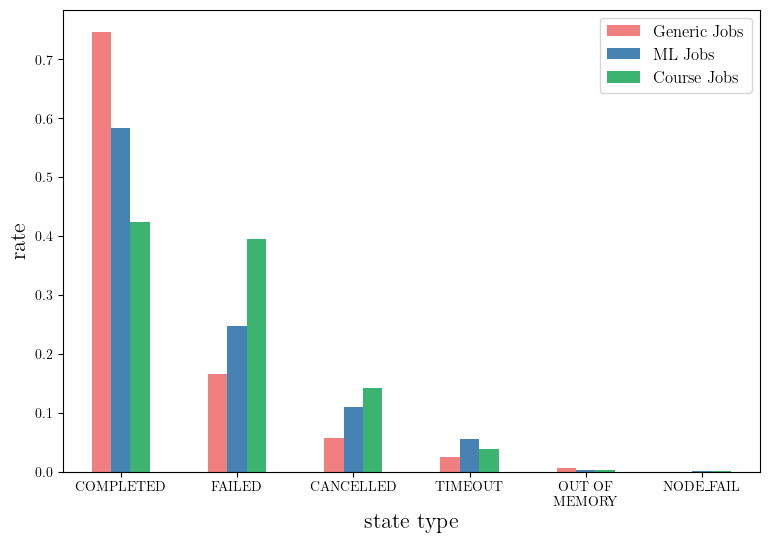

In [12]:
# fig.Generic, ML, and Course jobs distribution per execution state type

ml_state_l, ml_count_l = [], []
for idx, name in enumerate(ml_data['State'].value_counts().index.tolist()):
    ml_state_l.append(name)
    ml_count_l.append(ml_data['State'].value_counts(normalize=True)[idx])
print(ml_state_l[:6],'\n',ml_count_l[:6])
    
generic_state_l, generic_count_l = [], []
for idx, name in enumerate(generic_data['State'].value_counts().index.tolist()):
    generic_state_l.append(name)
    generic_count_l.append(generic_data['State'].value_counts(normalize=True)[idx])
print(generic_state_l[:6],'\n',generic_count_l[:6])

course_state_l, course_count_l = [], []
for idx, name in enumerate(course_data['State'].value_counts().index.tolist()):
    course_state_l.append(name)
    course_count_l.append(course_data['State'].value_counts(normalize=True)[idx])
print(course_state_l[:6],'\n',course_count_l[:6])

index = ['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT OF\nMEMORY', 'NODE_FAIL']

df = pd.DataFrame({'Generic Jobs': generic_count_l[:6], 'ML Jobs': ml_count_l[:6], 'Course Jobs': course_count_l[:6]}, index=index)
ax = df.plot.bar(figsize=(9,6), rot=0, ylabel='Percent', xlabel='State type', color = ['lightcoral','steelblue', 'mediumseagreen'])

ax.set_ylabel('rate',fontdict={'fontsize':16})
ax.set_xlabel('state type',fontdict={'fontsize':16})
ax.legend(fontsize=12)


['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_MEMORY', 'NODE_FAIL'] 
 [0.5838841755809664, 0.24752120988565104, 0.11042419771302102, 0.05523423091110291, 0.0028771670970121725, 4.795278495020288e-05]
['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_MEMORY', 'NODE_FAIL'] 
 [0.7473772686092794, 0.1657166169132062, 0.05680805560506148, 0.02422418018178578, 0.005852529258005109, 1.9957078357987286e-05]
['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_MEMORY', 'NODE_FAIL'] 
 [0.42318396622896315, 0.39497917328202925, 0.14167771821357192, 0.038141845826251006, 0.0019052244242299717, 0.00011207202495470422]


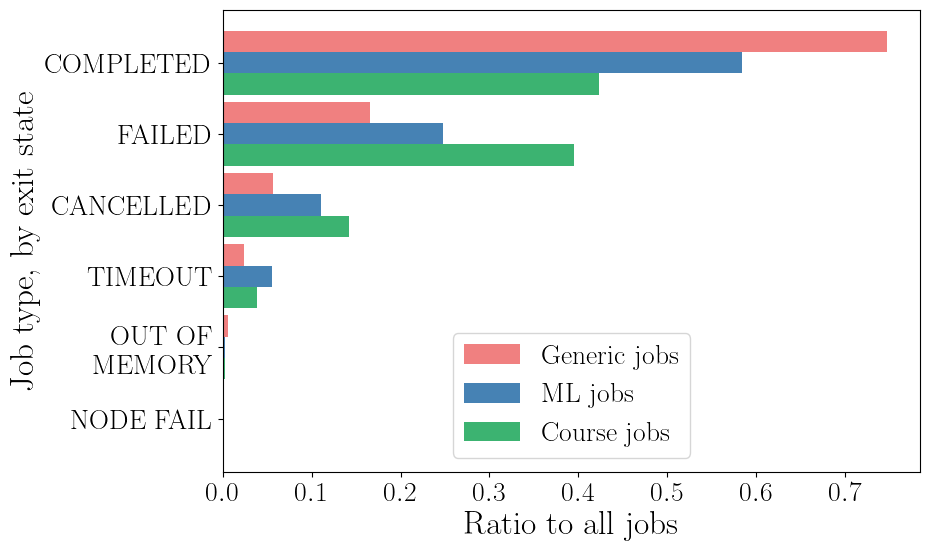

In [13]:
# [horizonal] fig.Generic, ML, and Course jobs distribution per execution state type

ml_state_l, ml_count_l = [], []
for idx, name in enumerate(ml_data['State'].value_counts().index.tolist()):
    ml_state_l.append(name)
    ml_count_l.append(ml_data['State'].value_counts(normalize=True)[idx])
print(ml_state_l[:6],'\n',ml_count_l[:6])

generic_state_l, generic_count_l = [], []
for idx, name in enumerate(generic_data['State'].value_counts().index.tolist()):
    generic_state_l.append(name)
    generic_count_l.append(generic_data['State'].value_counts(normalize=True)[idx])
print(generic_state_l[:6],'\n',generic_count_l[:6])

course_state_l, course_count_l = [], []
for idx, name in enumerate(course_data['State'].value_counts().index.tolist()):
    course_state_l.append(name)
    course_count_l.append(course_data['State'].value_counts(normalize=True)[idx])
print(course_state_l[:6],'\n',course_count_l[:6])

generic_count_l = generic_count_l[:6][::-1]
ml_count_l = ml_count_l[:6][::-1]
course_count_l = course_count_l[:6][::-1]
labels = ["COMPLETED", "FAILED", "CANCELLED", "TIMEOUT", "OUT OF\nMEMORY", "NODE FAIL"][::-1]

y_axis = np.arange(len(labels))

f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)

plt.barh(y_axis + 0.3, generic_count_l, 0.3, label = 'Generic jobs', color = 'lightcoral')
plt.barh(y_axis, ml_count_l, 0.3, label = 'ML jobs', color = 'steelblue')
plt.barh(y_axis - 0.3, course_count_l, 0.3, label = 'Course jobs', color = 'mediumseagreen')

plt.tick_params(axis='both', which='major', labelsize = 20)
plt.yticks(y_axis, labels)
plt.xlabel("Ratio to all jobs", fontsize = 24)
plt.ylabel("Job type, by exit state", fontsize = 24)
plt.legend(loc = "lower center", prop={'size': 20})
plt.show()

f.savefig('fig-state-type.pdf', bbox_inches = 'tight')

In [14]:
# tab.overview of our job traces dataset
# Data Source, Data Timespan, #Nodes, #Users, #Scheduled Jobs, 
# ML: %Completed Jobs, %Uncompleted Jobs, Generic: %Completed Jobs, %Uncompleted Jobs

def computeNumNodes(df):
    node_l = []
    for i in df["node_list"]:
        r = re.findall(r"r[0-9]+n[0-9]+",i)
        for j in r:
            node_l.append(j)
    node_l = set(node_l)
    return len(node_l)

DataSource = "SURFLisa"
DataTimespan = '14 months'
Year = 'Jan 2022 to Feb 2023'
numNodes = computeNumNodes(slurm_data)
numUsers = len(slurm_data['UID'].unique())
numJobs = len(slurm_data)

pctMLJobs = len(ml_data)*1.0/numJobs*1.0
pctGEJobs = len(generic_data)*1.0/numJobs*1.0
pctCSJobs = len(course_data)*1.0/numJobs*1.0

pctMLCompletedJobs = len(ml_data[ml_data["State"]=='COMPLETED'])*1.0/len(ml_data)
pctMLUncompletedJobs = len(ml_data[ml_data["State"]!='COMPLETED'])*1.0/len(ml_data)
pctGECompletedJobs = len(generic_data[generic_data["State"]=='COMPLETED'])*1.0/len(generic_data)
pctGEUncompletedJobs = len(generic_data[generic_data["State"]!='COMPLETED'])*1.0/len(generic_data)
pctCSCompletedJobs = len(course_data[course_data["State"]=='COMPLETED'])*1.0/len(course_data)
pctCSUncompletedJobs = len(course_data[course_data["State"]!='COMPLETED'])*1.0/len(course_data)

print("DataSource:{}, DataTimespan:{}, Year:{}, numNodes:{}, numUsers:{}, numJobs:{}".format(DataSource, DataTimespan, Year, numNodes, numUsers, numJobs))
print("%ML Jobs:{:.2%}, %Generic Jobs:{:.2%}, %Course Jobs:{:.2%}".format(pctMLJobs, pctGEJobs, pctCSJobs))
print("%ML Completed Jobs:{:.2%}, %ML Uncompleted Jobs:{:.2%}".format(pctMLCompletedJobs, pctMLUncompletedJobs))
print("%Generic Completed Jobs:{:.2%}, %Generic Uncompleted Jobs:{:.2%}".format(pctGECompletedJobs, pctGEUncompletedJobs))
print("%Course Completed Jobs:{:.2%}, %Course Uncompleted Jobs:{:.2%}".format(pctCSCompletedJobs, pctCSUncompletedJobs))


DataSource:SURFLisa, DataTimespan:14 months, Year:Jan 2022 to Feb 2023, numNodes:348, numUsers:2899, numJobs:2425724
%ML Jobs:11.18%, %Generic Jobs:88.82%, %Course Jobs:2.21%
%ML Completed Jobs:58.39%, %ML Uncompleted Jobs:41.61%
%Generic Completed Jobs:74.74%, %Generic Uncompleted Jobs:25.26%
%Course Completed Jobs:42.32%, %Course Uncompleted Jobs:57.68%


In [15]:
# 
group_date = slurm_data.copy()
group_date["submit_date"] = pd.to_datetime(group_date["submit_date"], utc = True)

group_date = group_date.set_index("submit_date")
group_date = group_date.groupby([group_date.index.date, "node_type"]).count().unstack(1)
datelist = list(group_date.index.values)

submissionlist = group_date["JobID"].fillna(0)  # just grab one column as all columns have the same counts
submissionlist.columns = ['ml', 'generic', 'course']


In [16]:
date_max_value = submissionlist.sum(axis=1).idxmax()
max_val = submissionlist.loc[date_max_value].sum()
print(date_max_value, max_val)
print("{:,}".format(max_val))

2022-06-14 163786.0
163,786.0


/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_88444/4071592870.py:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(bottom=1)


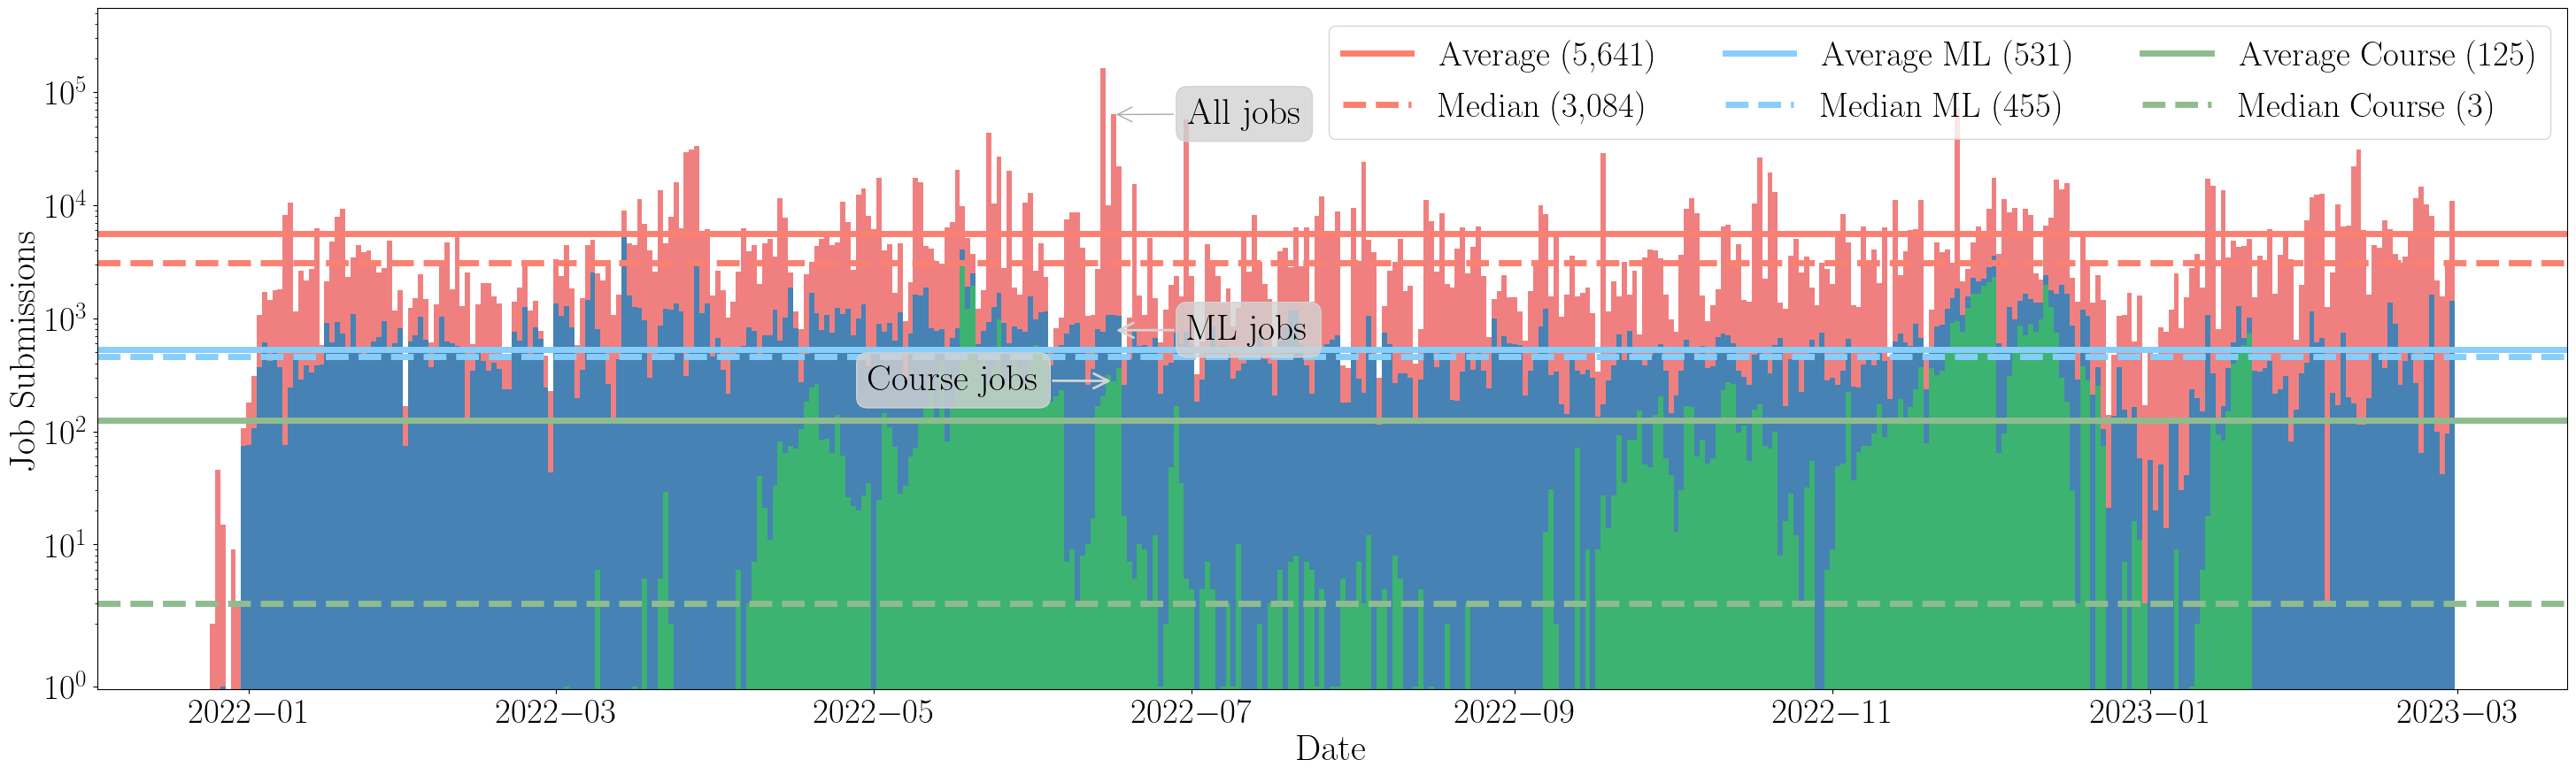

In [17]:
fig, ax = plt.subplots(figsize=(36, 10))
plt.yscale("symlog", subs = [1,2,3,4,5,6,7,8,9])
plt.ylim(bottom=1)
plt.ylim(top=5.5 * 10**5)
plt.locator_params(axis='y', numticks=12)
ax.bar(datelist, submissionlist.sum(axis=1), width=1, color="lightcoral")
ax.bar(datelist, submissionlist['ml'] + submissionlist['course'], width=1, color="steelblue")  # Plot ML jobs overlapping
ax.bar(datelist, submissionlist['course'], width=1, color="mediumseagreen") 
plt.xlabel("Date", fontsize=30)
plt.ylabel("Job Submissions", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=28)
ax.tick_params(axis='both', which='minor', labelsize=28)

annotate_date = submissionlist.sum(axis=1).sort_values().index[-3]
annotate_value_all_jobs = submissionlist.sum(axis=1).loc[annotate_date]
annotate_value_ml_jobs = submissionlist['ml'].loc[annotate_date]
annotate_value_cs_jobs = submissionlist['course'].loc[annotate_date]

fc = colors.to_rgba('lightgrey')
ec = colors.to_rgba('lightgray')
fc = fc[:-1] + (0.8,)
bbox = dict(boxstyle = "round", fc = fc, ec = ec)

ax.annotate("All jobs",
            xy=(annotate_date, annotate_value_all_jobs), xycoords='data',
            xytext=(60, -7), textcoords='offset points',
            fontsize=30,bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color = "darkgray",
                            linewidth = 1
                           )
            )

ax.annotate("ML jobs",
            xy=(annotate_date, annotate_value_ml_jobs), xycoords='data',
            xytext=(60, -7), textcoords='offset points',
            fontsize=30, color="black",bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color="lightgray",
                            linewidth = 2
                           )
            )

ax.annotate("Course jobs",
            xy=(annotate_date, annotate_value_cs_jobs), xycoords='data',
            xytext=(-200, -7), textcoords='offset points',
            fontsize=30, color="black",bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color="lightgray",
                            linewidth = 2
                           )
            )

combined = submissionlist.sum(axis=1)

median = combined.median()
median_zeroes_filtered = combined[combined > 0].median()
median_ml_jobs = submissionlist['ml'].median()
median_cs_jobs = submissionlist['course'].median()

avg = combined.mean()
avg_ml_jobs = submissionlist['ml'].mean()
avg_cs_jobs = submissionlist['course'].mean()

ax.axhline(avg, label="Average ({:,.0f})".format(avg), color="salmon", linestyle="solid", linewidth = 5)
ax.axhline(median, label="Median ({:,})".format(int(median)), color="salmon", linestyle="dashed", linewidth = 5)
ax.axhline(avg_ml_jobs, label="Average ML ({:,.0f})".format(avg_ml_jobs), color="lightskyblue", linestyle="solid", linewidth = 5)
ax.axhline(median_ml_jobs, label="Median ML ({:,})".format(int(median_ml_jobs)), color="lightskyblue", linestyle="dashed", linewidth = 5)
ax.axhline(avg_cs_jobs, label="Average Course ({:,.0f})".format(avg_cs_jobs), color="darkseagreen", linestyle="solid", linewidth = 5)
ax.axhline(median_cs_jobs, label="Median Course ({:,})".format(int(median_cs_jobs)), color="darkseagreen", linestyle="dashed", linewidth = 5)
ax.legend(ncol=3, prop={"size": 28}, loc="upper right")

plt.savefig('fig-job-by-date-1.pdf', bbox_inches = 'tight')



/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_88444/2553348196.py:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(bottom=1)


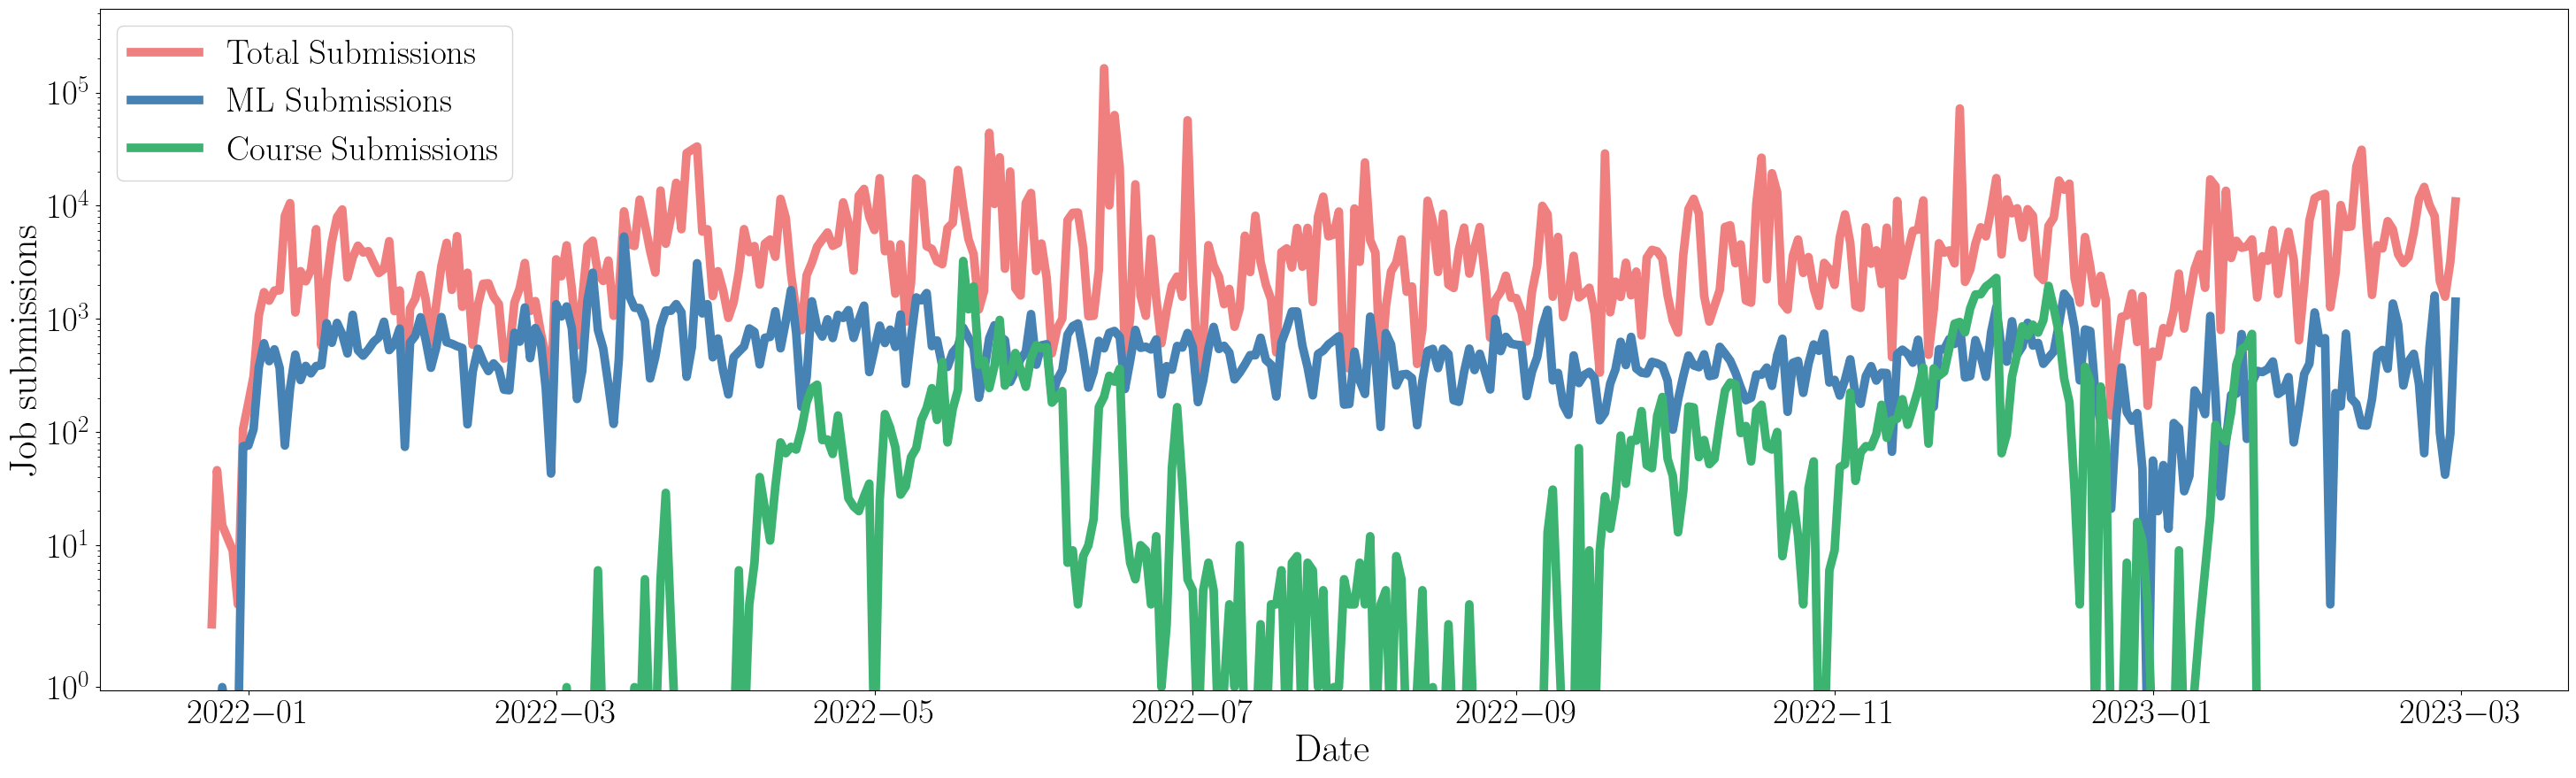

In [46]:
fig, ax = plt.subplots(figsize=(36, 10))
plt.yscale("symlog", subs=[1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim(bottom=1)
plt.ylim(top=5.5 * 10**5)
plt.locator_params(axis='y', numticks=12)
ax.plot(datelist, submissionlist.sum(axis=1), color="lightcoral", linewidth=6, label='Total Submissions')
ax.plot(datelist, submissionlist['ml'], color="steelblue", linewidth=6, label='ML Submissions')
ax.plot(datelist, submissionlist['course'], color="mediumseagreen", linewidth=6, label='Course Submissions')

plt.xlabel("Date", fontsize=32)
plt.ylabel("Job submissions", fontsize=32)
ax.tick_params(axis='both', which='major', labelsize=28)

# Add legend
ax.legend(fontsize=28)

annotate_date = submissionlist.sum(axis=1).sort_values().index[-3]
annotate_value_all_jobs = submissionlist.sum(axis=1).loc[annotate_date]
annotate_value_ml_jobs = submissionlist['ml'].loc[annotate_date]
annotate_value_cs_jobs = submissionlist['course'].loc[annotate_date]

fc = colors.to_rgba('lightgrey')
ec = colors.to_rgba('lightgray')
fc = fc[:-1] + (0.8,)
bbox = dict(boxstyle="round", fc=fc, ec=ec)

plt.savefig('fig-job-by-date.pdf', bbox_inches='tight')
plt.savefig('pre-fig-job-by-date.png', bbox_inches='tight')


## CPU Usage

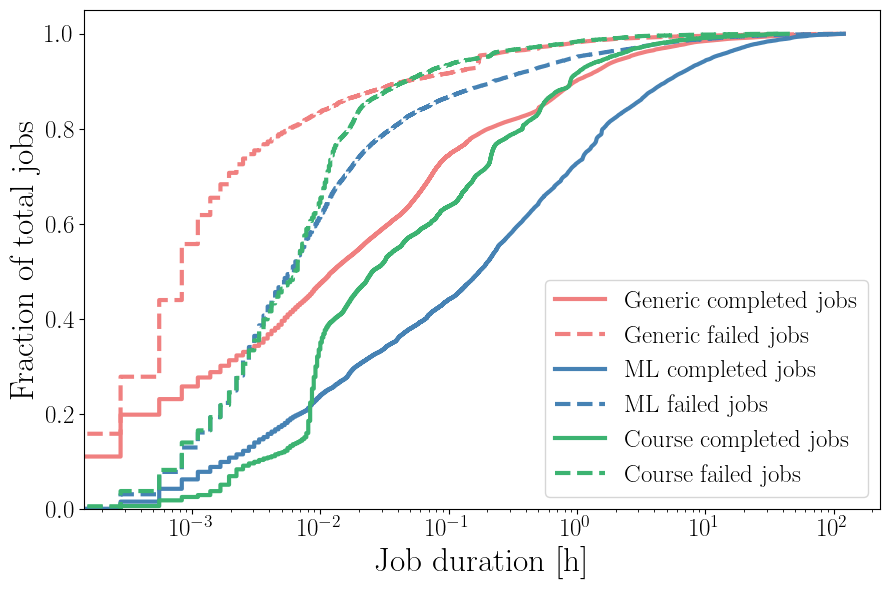

In [19]:
# Job duration CDF

def normalize(df):
    df = df['target'].value_counts(sort=False, normalize=True).rename_axis('target').reset_index(name='pdf')
    df["cdf"] = df["pdf"].cumsum()
    return df

def cdf(df_elapsed_values):
    all_values_df = pd.DataFrame({"target": df_elapsed_values["elapsedraw"].values})
    count_df = normalize(all_values_df)
    counts = np.unique(df_elapsed_values["elapsedraw"].values, return_counts=True)
    pdf = counts[1] / np.sum(counts[1])
    cdf = np.cumsum(pdf)
    return counts, cdf

ge_completed_counts, ge_completed_cdf = cdf(ge_completed)
ge_failed_counts, ge_failed_cdf = cdf(ge_failed)
ml_completed_counts, ml_completed_cdf = cdf(ml_completed)
ml_failed_counts, ml_failed_cdf = cdf(ml_failed)
cs_completed_counts, cs_completed_cdf = cdf(cs_completed)
cs_failed_counts, cs_failed_cdf = cdf(cs_failed)

fig = plt.figure(figsize=(9, 6))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylim(0,1.05)
plt.plot(ge_completed_counts[0], ge_completed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'solid', label = 'Generic completed jobs', linewidth=3)
plt.plot(ge_failed_counts[0], ge_failed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'dashed', label = 'Generic failed jobs', linewidth=3)
plt.plot(ml_completed_counts[0], ml_completed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'solid', label = 'ML completed jobs', linewidth=3)
plt.plot(ml_failed_counts[0], ml_failed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'dashed', label = 'ML failed jobs', linewidth=3)
plt.plot(cs_completed_counts[0], cs_completed_cdf, drawstyle='steps', color = 'mediumseagreen', linestyle = 'solid', label = 'Course completed jobs', linewidth=3)
plt.plot(cs_failed_counts[0], cs_failed_cdf, drawstyle='steps', color = 'mediumseagreen', linestyle = 'dashed', label = 'Course failed jobs', linewidth=3)
plt.xscale("log")
plt.xlabel("Job duration [h]", fontsize=24)
plt.ylabel("Fraction of total jobs", fontsize=24)
plt.legend(loc = "lower right", prop={'size': 18})

# plt.arrow(0.003, 0.5, -0.002, 0, head_width=0.02, head_length=0.0001, linewidth=6, color='lime')
# plt.arrow(0.001, 0.5, 0.0045, 0, head_width=0.02, head_length=0.0005, linewidth=6, color='lime', length_includes_head=True)
# bbox = dict(boxstyle ="round", fc ="0.8")

# plt.annotate("18 [s]",
#             xy=(0.0017, 0.5), xycoords='data',
#             xytext=(20, 30), textcoords='offset points',
#             fontsize=16, color="black",bbox=bbox,
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc",
#                             color="black"
#                            )
#             )

# plt.arrow(0.3, 0.9, -0.001, 0, head_width=0.005, head_length=0.01, linewidth=8, color='lime')
# plt.arrow(0.3, 0.9, 3.591639, 0, head_width=0.005, head_length=0.1, linewidth=8, color='lime', length_includes_head=True)
# bbox = dict(boxstyle ="round", fc ="0.8")

# plt.annotate("3.59 [h]",
#             xy=(1, 0.9), xycoords='data',
#             xytext=(20, -30), textcoords='offset points',
#             fontsize=16, color="black",bbox=bbox,
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc",
#                             color="black"
#                            )
#             )

# plt.arrow(0.1, 0.8695, 0, 0, head_width=0.01, head_length=0.01, linewidth=8, color='lime')

# plt.annotate("86.95%",
#             xy=(0.1, 0.86), xycoords='data',
#             xytext=(-50, 30), textcoords='offset points',
#             fontsize=16, color="black",bbox=bbox,
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc",
#                             color="black"
#                            )
#             )

# plt.axhline(0.8695, color="lime", linestyle="dotted", linewidth = 4)
plt.tight_layout()
plt.savefig('fig-job-cdf.pdf', bbox_inches = 'tight')


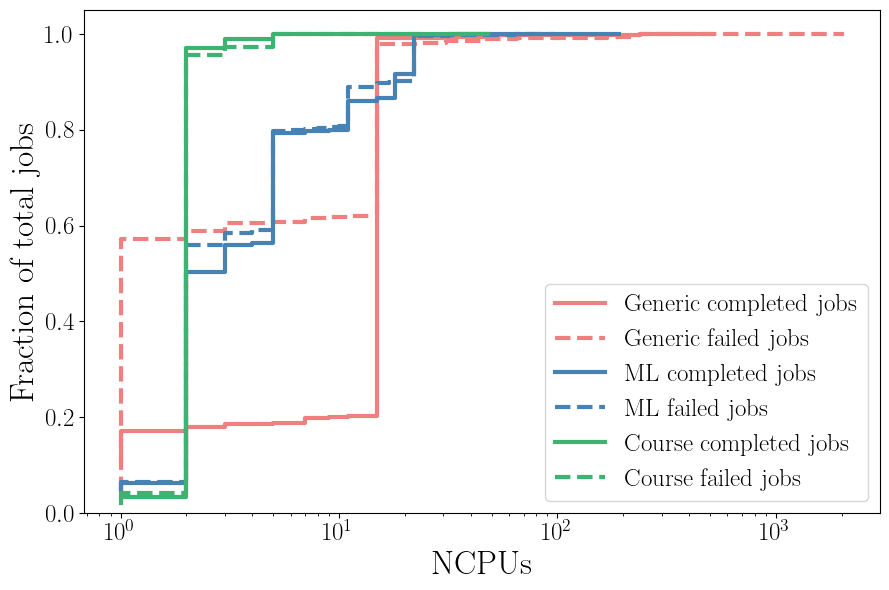

In [20]:
def normalize(df):
    df = df['target'].value_counts(sort=False, normalize=True).rename_axis('target').reset_index(name='pdf')
    df["cdf"] = df["pdf"].cumsum()
    return df

def cdf(df_elapsed_values):
    all_values_df = pd.DataFrame({"target": df_elapsed_values["NCPUS"].values})
    count_df = normalize(all_values_df)
    counts = np.unique(df_elapsed_values["NCPUS"].values, return_counts=True)
    pdf = counts[1] / np.sum(counts[1])
    cdf = np.cumsum(pdf)
    return counts, cdf

ge_completed_counts, ge_completed_cdf = cdf(ge_completed)
ge_failed_counts, ge_failed_cdf = cdf(ge_failed)
ml_completed_counts, ml_completed_cdf = cdf(ml_completed)
ml_failed_counts, ml_failed_cdf = cdf(ml_failed)
cs_completed_counts, cs_completed_cdf = cdf(cs_completed)
cs_failed_counts, cs_failed_cdf = cdf(cs_failed)

fig = plt.figure(figsize=(9, 6))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylim(0,1.05)
plt.plot(ge_completed_counts[0], ge_completed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'solid', label = 'Generic completed jobs', linewidth=3)
plt.plot(ge_failed_counts[0], ge_failed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'dashed', label = 'Generic failed jobs', linewidth=3)
plt.plot(ml_completed_counts[0], ml_completed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'solid', label = 'ML completed jobs', linewidth=3)
plt.plot(ml_failed_counts[0], ml_failed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'dashed', label = 'ML failed jobs', linewidth=3)
plt.plot(cs_completed_counts[0], cs_completed_cdf, drawstyle='steps', color = 'mediumseagreen', linestyle = 'solid', label = 'Course completed jobs', linewidth=3)
plt.plot(cs_failed_counts[0], cs_failed_cdf, drawstyle='steps', color = 'mediumseagreen', linestyle = 'dashed', label = 'Course failed jobs', linewidth=3)

plt.xscale("log")
plt.xlabel("NCPUs", fontsize=24)
plt.ylabel("Fraction of total jobs", fontsize=24)
plt.legend(loc = "lower right", prop={'size': 18})

plt.tight_layout()
plt.savefig('fig-ncpu-cdf.pdf', bbox_inches = 'tight')


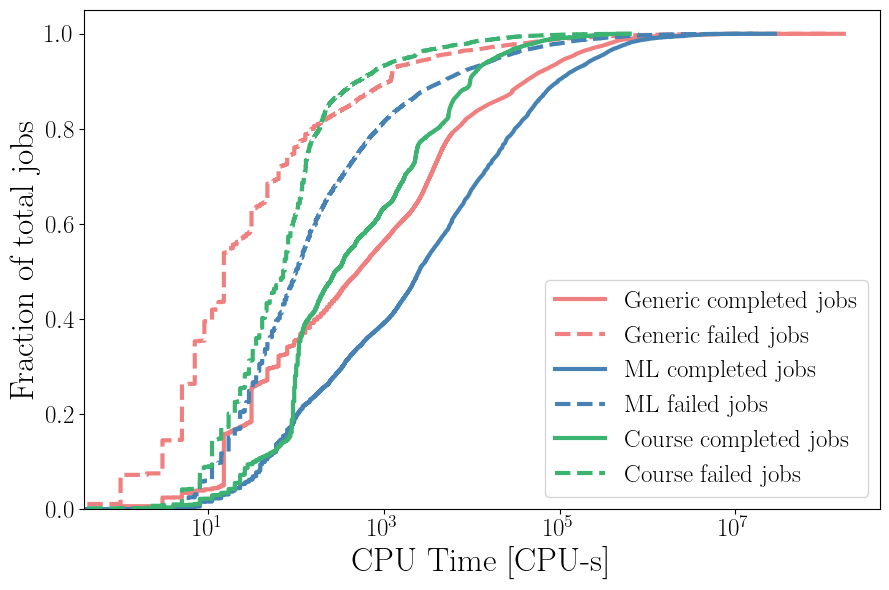

In [21]:
def normalize(df):
    df = df.value_counts(sort=False, normalize=True).rename_axis('target').reset_index(name='pdf')
    df["cdf"] = df["pdf"].cumsum()
    return df


def cdf(df_elapsed_values):
    all_values_df = pd.DataFrame({"target": df_elapsed_values["CPUTimeRAW"].values})
    count_df = normalize(all_values_df)
    counts = np.unique(df_elapsed_values["CPUTimeRAW"].values, return_counts=True)
    pdf = counts[1] / np.sum(counts[1])
    cdf = np.cumsum(pdf)
    return counts, cdf

ge_completed_counts, ge_completed_cdf = cdf(ge_completed)
ge_failed_counts, ge_failed_cdf = cdf(ge_failed)
ml_completed_counts, ml_completed_cdf = cdf(ml_completed)
ml_failed_counts, ml_failed_cdf = cdf(ml_failed)
cs_completed_counts, cs_completed_cdf = cdf(cs_completed)
cs_failed_counts, cs_failed_cdf = cdf(cs_failed)

fig = plt.figure(figsize=(9, 6))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylim(0,1.05)
plt.plot(ge_completed_counts[0], ge_completed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'solid', label = 'Generic completed jobs', linewidth=3)
plt.plot(ge_failed_counts[0], ge_failed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'dashed', label = 'Generic failed jobs', linewidth=3)
plt.plot(ml_completed_counts[0], ml_completed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'solid', label = 'ML completed jobs', linewidth=3)
plt.plot(ml_failed_counts[0], ml_failed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'dashed', label = 'ML failed jobs', linewidth=3)
plt.plot(cs_completed_counts[0], cs_completed_cdf, drawstyle='steps', color = 'mediumseagreen', linestyle = 'solid', label = 'Course completed jobs', linewidth=3)
plt.plot(cs_failed_counts[0], cs_failed_cdf, drawstyle='steps', color = 'mediumseagreen', linestyle = 'dashed', label = 'Course failed jobs', linewidth=3)

plt.xscale("log")
plt.xlabel("CPU Time [CPU-s]", fontsize=24)
plt.ylabel("Fraction of total jobs", fontsize=24)
plt.legend(loc = "lower right", prop={'size': 18})

plt.tight_layout()
plt.savefig('fig-cputime-cdf.pdf', bbox_inches = 'tight')


In [22]:
# compute cpus
count = 0
for i in ge_completed['NCPUS']:
    if i == 16:
        count +=1
ratio_failed = count/len(ge_completed)

print('GE completed CPU=16', ratio_failed)


GE completed CPU=16 0.7887863072922909


In [23]:
ge_failed['elapsedraw'].mean()*60, ml_failed['elapsedraw'].mean()*60

(12.723580315374484, 29.042777272749852)

In [24]:
# compute jobs <= 300 seconds
count = 0
for i in ml_completed['ElapsedRaw']:
    if i <= 360:
        count +=1
ratio_completed = count/len(ml_completed)
print('ML completed Jobs <= 360 seconds', ratio_completed)

count = 0
for i in ml_failed['ElapsedRaw']:
    if i <= 360:
        count +=1
ratio_failed = count/len(ml_failed)
print('ML failed Jobs <= 360 seconds', ratio_failed)
print('difference:', ratio_failed - ratio_completed)

ML completed Jobs <= 360 seconds 0.44111162352881716
ML failed Jobs <= 360 seconds 0.8671743439190498
difference: 0.42606272039023263


In [25]:
# Remove Outlier in Resource data
data2 = slurm_data.copy()
def three_sigma(ser1): 
    mean_value = ser1.mean()
    std_value = ser1.std()
    rule = (mean_value - 3 * std_value > ser1) | \
                                                   (ser1.mean() + 3 * ser1.std() < ser1)
    index = np.arange(ser1.shape[0])[rule]
    outrange = ser1.iloc[index]
    return outrange

df1 = three_sigma(data2['CPUTimeRAW'])
data2.replace(to_replace=df1, value=np.nan)
df2 = three_sigma(data2['NCPUS'])
data2.replace(to_replace=df2, value=np.nan)
df3 = three_sigma(data2['ReqCPUS'])
data2.replace(to_replace=df3, value=np.nan)
# print(df1, df2, df3)


,JobID,GID,UID,Partition,Submit,Start,End,ElapsedRaw,CPUTimeRAW,NCPUS,...,req_mem,node_list,submit_hour_of_day,submit_day_of_week,sumbit_day_of_month,submit_date,waiting_time,running_time,node_type,elapsedraw
0,8611429_9,42542.0,42783.0,normal,2021-12-25 17:55:07,2021-12-27 09:21:31,2022-01-01 09:21:51,432020,6912320,16,...,92160.0,{'r10n31'},17,5,25,2021-12-25,141984.0,432020.0,1,120.005556
1,8611429_10,42542.0,42783.0,normal,2021-12-25 17:55:07,2021-12-27 09:24:32,2022-01-01 09:24:51,432019,6912304,16,...,92160.0,{'r14n23'},17,5,25,2021-12-25,142165.0,432019.0,1,120.005278
2,8612272_31,55571.0,56006.0,normal,2021-12-26 18:11:18,2021-12-27 00:06:31,2022-01-01 00:06:50,432019,6912304,16,...,92160.0,{'r13n5'},18,6,26,2021-12-26,21313.0,432019.0,1,120.005278
3,8612272_33,55571.0,56006.0,normal,2021-12-26 18:11:18,2021-12-27 00:06:43,2022-01-01 00:06:50,432007,6912112,16,...,92160.0,{'r14n27'},18,6,26,2021-12-26,21325.0,432007.0,1,120.001944
4,8612272_34,55571.0,56006.0,normal,2021-12-26 18:11:18,2021-12-27 00:06:43,2022-01-01 00:06:50,432007,6912112,16,...,92160.0,{'r15n12'},18,6,26,2021-12-26,21325.0,432007.0,1,120.001944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161576,10784780.0,NaN,NaN,NaN,2023-02-28 23:32:55,2023-02-28 23:32:55,2023-02-28 23:33:08,13,78,6,...,NaN,{'r28n2'},23,1,28,2023-02-28,0.0,13.0,0,0.003611
2161577,10784799,59194.0,59671.0,gpu_titanrtx_shared,2023-02-28 23:46:12,2023-02-28 23:46:12,2023-02-28 23:46:23,11,66,6,...,32000.0,{'r28n2'},23,1,28,2023-02-28,0.0,11.0,0,0.003056
2161578,10784799.ba+,NaN,NaN,NaN,2023-02-28 23:46:12,2023-02-28 23:46:12,2023-02-28 23:46:23,11,66,6,...,NaN,{'r28n2'},23,1,28,2023-02-28,0.0,11.0,0,0.003056
2161579,10784799.ex+,NaN,NaN,NaN,2023-02-28 23:46:12,2023-02-28 23:46:12,2023-02-28 23:46:23,11,66,6,...,NaN,{'r28n2'},23,1,28,2023-02-28,0.0,11.0,0,0.003056


In [26]:
# fill NaN values use mean()
data2['CPUTimeRAW'].fillna(data2['CPUTimeRAW'].mean(), inplace=True)
data2['NCPUS'].fillna(data2['NCPUS'].mean(), inplace=True)
data2['ReqCPUS'].fillna(data2['ReqCPUS'].mean(), inplace=True)

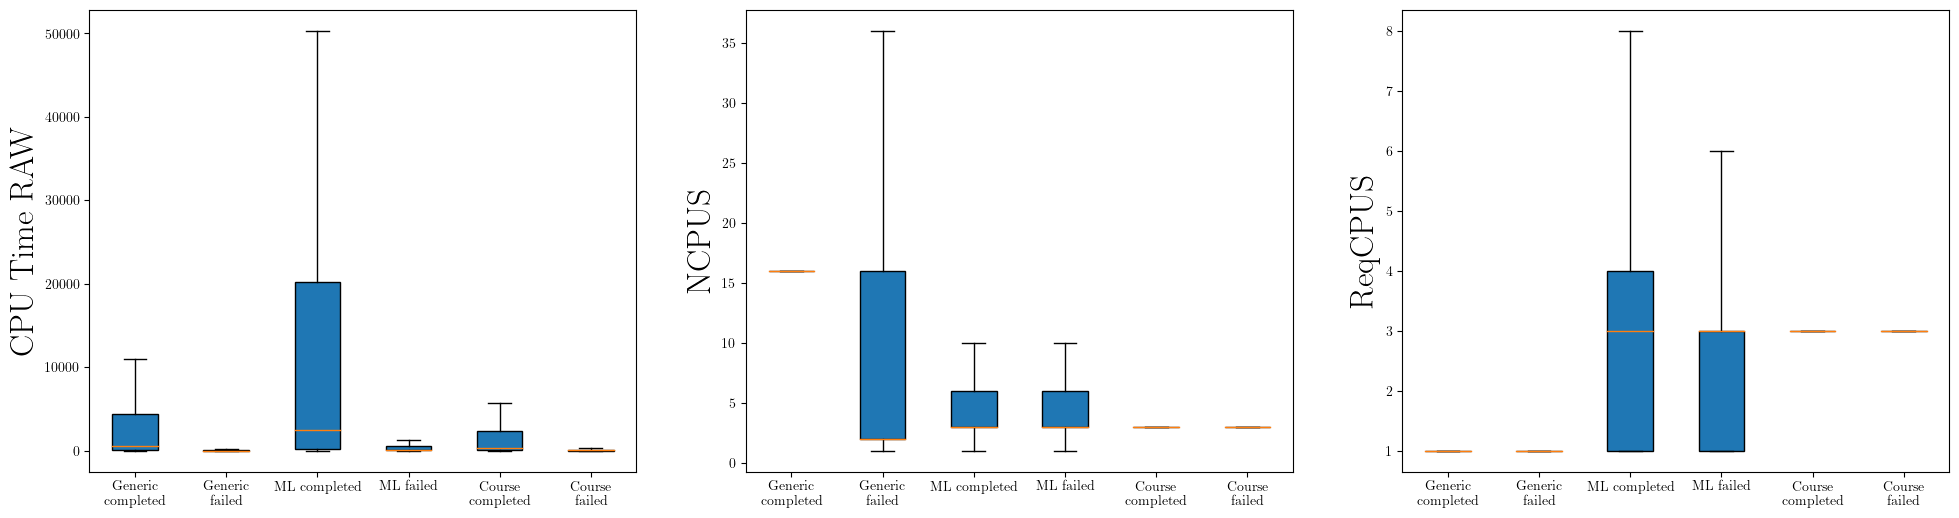

In [27]:
# CPUTimeRAW, NCPUS, ReqCPUS
fig, axes = plt.subplots(figsize = (24, 6), nrows = 1, ncols = 3)
box_1, box_2, box_3, box_4, box_5, box_6 = ge_completed['CPUTimeRAW'], ge_failed['CPUTimeRAW'], ml_completed['CPUTimeRAW'], ml_failed['CPUTimeRAW'], cs_completed['CPUTimeRAW'], cs_failed['CPUTimeRAW']
axes[0].boxplot([box_1, box_2, box_3, box_4, box_5, box_6], patch_artist = True, showfliers = False, labels = ['Generic\ncompleted', 'Generic\nfailed', 'ML completed', 'ML failed', "Course\ncompleted", "Course\nfailed"])
axes[0].set_ylabel("CPU Time RAW", fontsize = 24)

box_1, box_2, box_3, box_4, box_5, box_6  = ge_completed['NCPUS'], ge_failed['NCPUS'], ml_completed['NCPUS'], ml_failed['NCPUS'], cs_completed['NCPUS'], cs_failed['NCPUS']
axes[1].boxplot([box_1, box_2, box_3, box_4, box_5, box_6 ], patch_artist = True, showfliers = False, labels = ['Generic\ncompleted', 'Generic\nfailed', 'ML completed', 'ML failed', "Course\ncompleted", "Course\nfailed"])
axes[1].set_ylabel("NCPUS", fontsize = 24)

box_1, box_2, box_3, box_4, box_5, box_6  = ge_completed['ReqCPUS'], ge_failed['ReqCPUS'], ml_completed['ReqCPUS'], ml_failed['ReqCPUS'], cs_completed['ReqCPUS'], cs_failed['ReqCPUS']
axes[2].boxplot([box_1, box_2, box_3, box_4, box_5, box_6 ], patch_artist = True, showfliers = False, labels = ['Generic\ncompleted', 'Generic\nfailed', 'ML completed', 'ML failed', "Course\ncompleted", "Course\nfailed"])
axes[2].set_ylabel("ReqCPUS", fontsize = 24)

plt.savefig('fig-box.pdf', bbox_inches = 'tight')
plt.show()


## Arrival Patterns

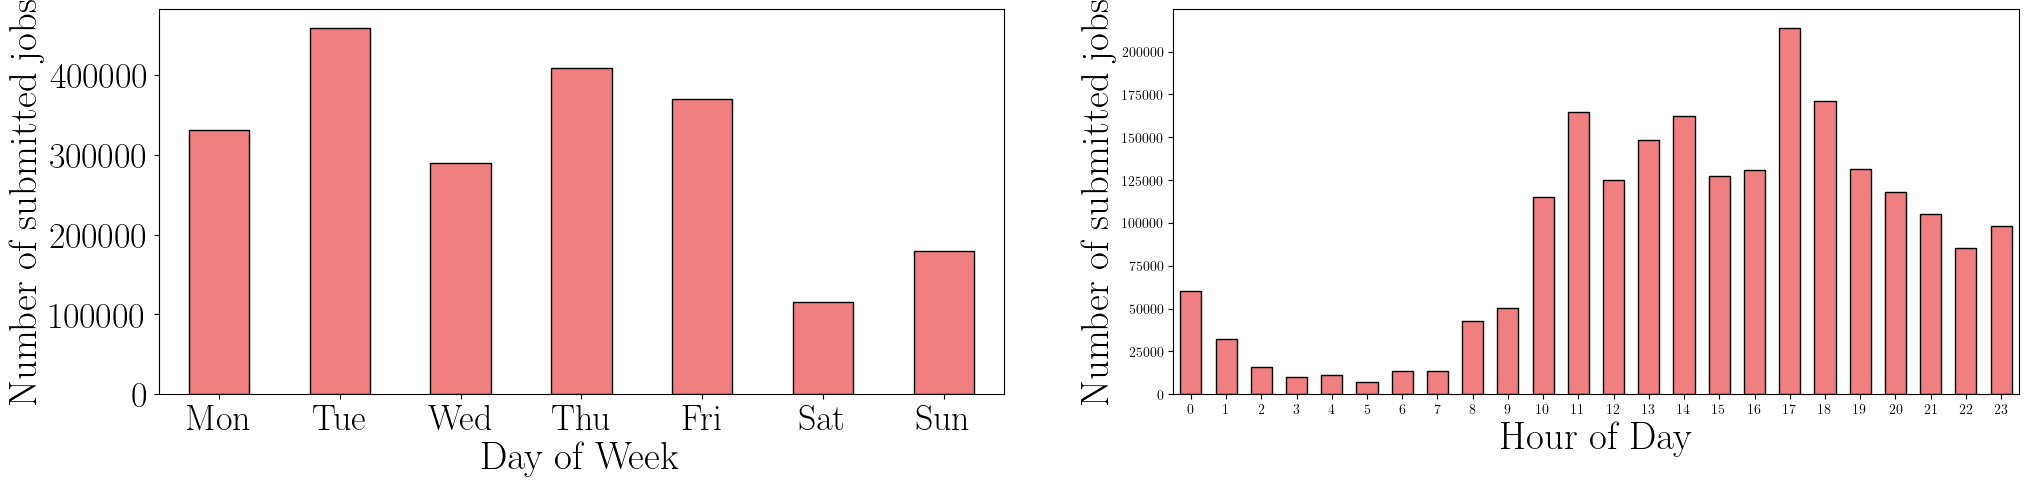

In [28]:
# fig-generic-submissions-week-and-day
fig, axes = plt.subplots(figsize = (24, 5), nrows = 1, ncols = 2)

x_vals = np.arange(generic_data["submit_hour_of_day"].nunique())
y_vals = generic_data["submit_hour_of_day"].value_counts(sort=False).sort_index()
axes[1].bar(x_vals, y_vals, edgecolor='black', capsize=5, width = 0.6, color = 'lightcoral')
axes[1].set_ylim(bottom=0, top=None)
axes[1].set_xlim(-0.5,23.5)
axes[1].set_xlabel("Hour of Day",  fontsize=28)
axes[1].set_ylabel("Number of submitted jobs", fontsize=28)
axes[1].tick_params(axis='both', which='minor', labelsize=20)
axes[1].xaxis.set_major_locator(MultipleLocator(1))

x_vals = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
y_vals = generic_data["submit_day_of_week"].value_counts(sort=False).sort_index()
axes[0].bar(x_vals, y_vals, edgecolor='black', capsize=3, width = 0.5, color = 'lightcoral')
axes[0].set_ylim(bottom=0, top=None)
axes[0].set_xlim(-0.5,6.5)
axes[0].set_xlabel("Day of Week", fontsize=28)
axes[0].set_ylabel("Number of submitted jobs", fontsize=28)
axes[0].tick_params(axis='both', which='major', labelsize=26)
axes[0].tick_params(axis='both', which='minor', labelsize=26)
axes[0].xaxis.set_major_locator(MultipleLocator(1))

plt.show()
fig.savefig('fig-generic-submissions-week-and-day.pdf', bbox_inches = 'tight')


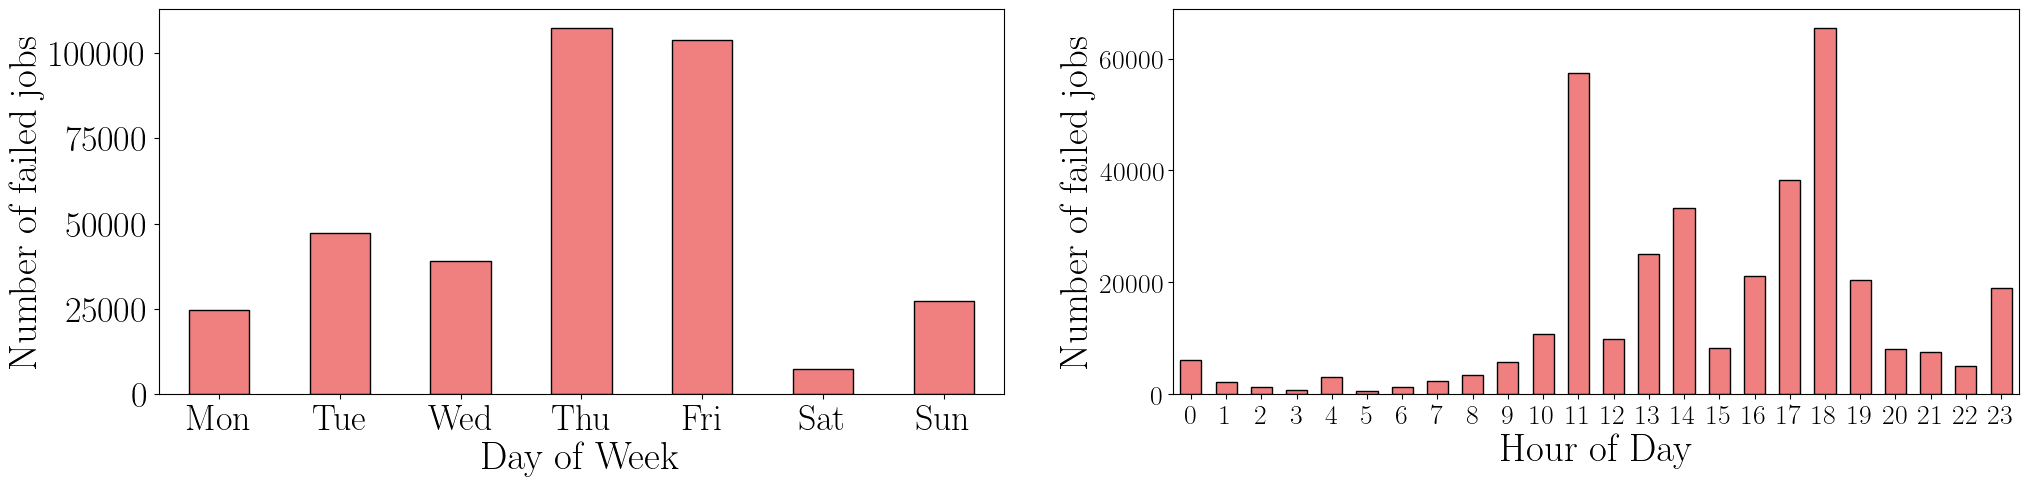

In [29]:
# fig-generic-failures-week-and-day
fig, axes = plt.subplots(figsize = (24, 5), nrows = 1, ncols = 2)

x_vals = np.arange(ge_failed["submit_hour_of_day"].nunique())
y_vals = ge_failed["submit_hour_of_day"].value_counts(sort=False).sort_index()
axes[1].bar(x_vals, y_vals, edgecolor='black', capsize=5, width = 0.6, color = 'lightcoral')
axes[1].set_ylim(bottom=0, top=None)
axes[1].set_xlim(-0.5,23.5)
axes[1].set_xlabel("Hour of Day",  fontsize=28)
axes[1].set_ylabel("Number of failed jobs", fontsize=28)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='minor', labelsize=20)
axes[1].xaxis.set_major_locator(MultipleLocator(1))

x_vals = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
y_vals = ge_failed["submit_day_of_week"].value_counts(sort=False).sort_index()
axes[0].bar(x_vals, y_vals, edgecolor='black', capsize=3, width = 0.5, color = 'lightcoral')
axes[0].set_ylim(bottom=0, top=None)
axes[0].set_xlim(-0.5,6.5)
axes[0].set_xlabel("Day of Week", fontsize=28)
axes[0].set_ylabel("Number of failed jobs", fontsize=28)
axes[0].tick_params(axis='both', which='major', labelsize=26)
axes[0].tick_params(axis='both', which='minor', labelsize=26)
axes[0].xaxis.set_major_locator(MultipleLocator(1))

plt.show()
fig.savefig('fig-generic-failures-week-and-day.pdf', bbox_inches = 'tight')


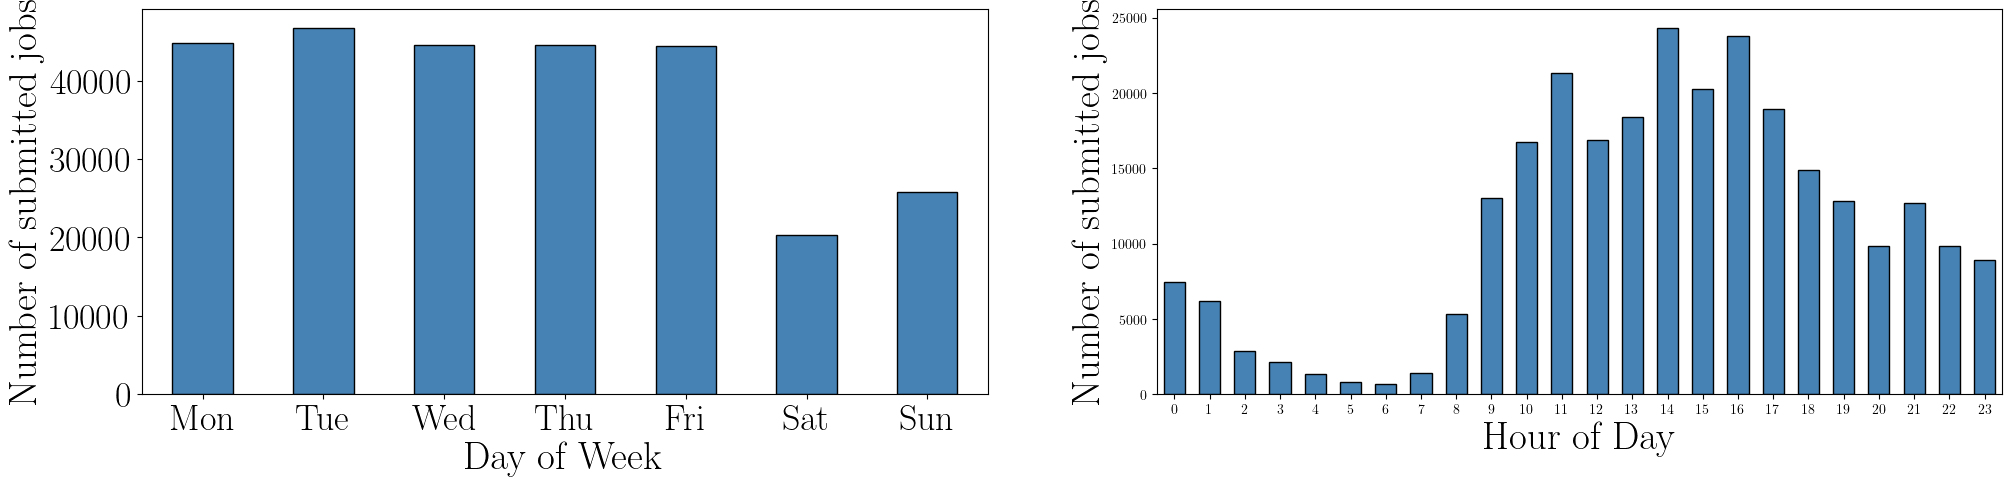

In [30]:
# fig-ml-submissions-week-and-day
fig, axes = plt.subplots(figsize = (24, 5), nrows = 1, ncols = 2)

x_vals = np.arange(ml_data["submit_hour_of_day"].nunique())
y_vals = ml_data["submit_hour_of_day"].value_counts(sort=False).sort_index()
axes[1].bar(x_vals, y_vals, edgecolor='black', capsize=5, width = 0.6, color = 'steelblue')
axes[1].set_ylim(bottom=0, top=None)
axes[1].set_xlim(-0.5,23.5)
axes[1].set_xlabel("Hour of Day",  fontsize=28)
axes[1].set_ylabel("Number of submitted jobs", fontsize=28)
axes[1].tick_params(axis='both', which='minor', labelsize=20)
axes[1].xaxis.set_major_locator(MultipleLocator(1))

x_vals = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
y_vals = ml_data["submit_day_of_week"].value_counts(sort=False).sort_index()
axes[0].bar(x_vals, y_vals, edgecolor='black', capsize=3, width = 0.5, color = 'steelblue')
axes[0].set_ylim(bottom=0, top=None)
axes[0].set_xlim(-0.5,6.5)
axes[0].set_xlabel("Day of Week", fontsize=28)
axes[0].set_ylabel("Number of submitted jobs", fontsize=28)
axes[0].tick_params(axis='both', which='major', labelsize=26)
axes[0].tick_params(axis='both', which='minor', labelsize=26)
axes[0].xaxis.set_major_locator(MultipleLocator(1))

plt.show()
fig.savefig('fig-ml-submissions-week-and-day.pdf', bbox_inches = 'tight')

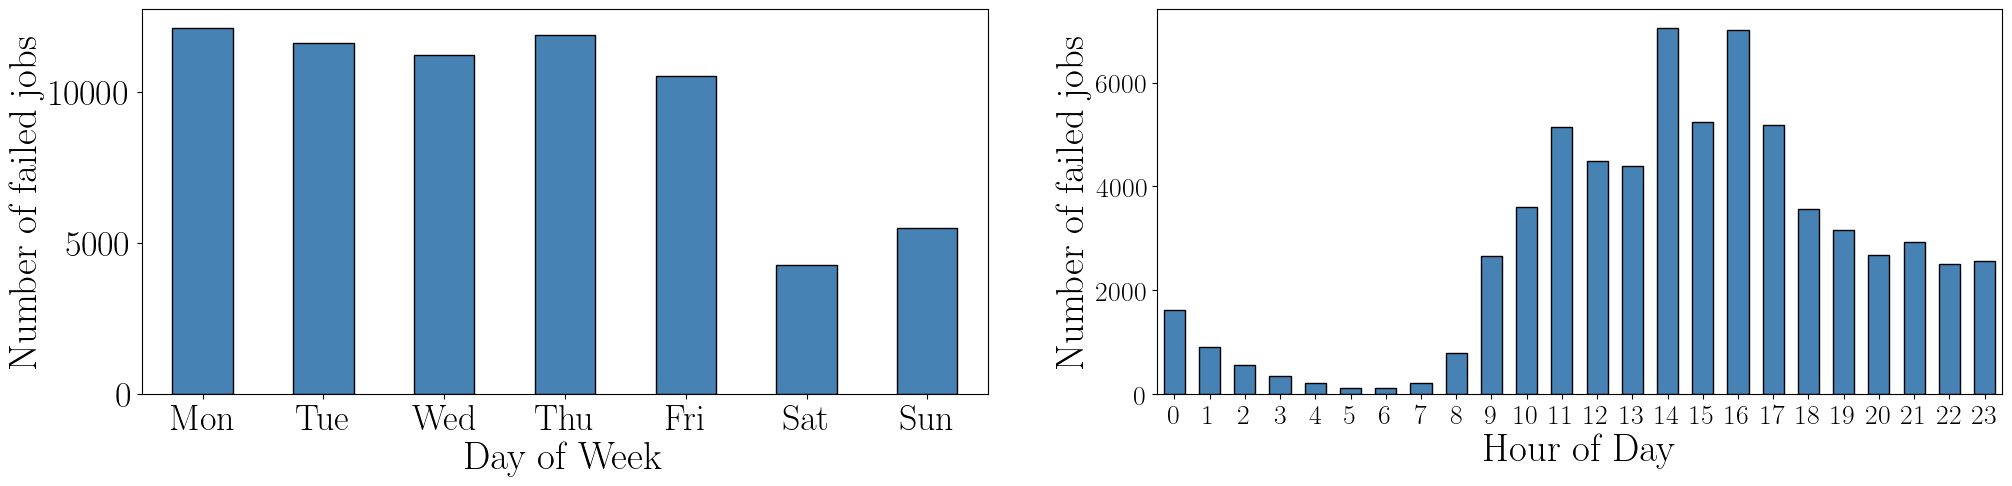

In [31]:
# fig-ml-failures-week-and-day
fig, axes = plt.subplots(figsize = (24, 5), nrows = 1, ncols = 2)

x_vals = np.arange(ml_failed["submit_hour_of_day"].nunique())
y_vals = ml_failed["submit_hour_of_day"].value_counts(sort=False).sort_index()
axes[1].bar(x_vals, y_vals, edgecolor='black', capsize=2, width = 0.6, color = 'steelblue')
axes[1].set_ylim(bottom=0, top=None)
axes[1].set_xlim(-0.5,23.5)
axes[1].set_xlabel("Hour of Day",  fontsize=28)
axes[1].set_ylabel("Number of failed jobs", fontsize=28)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='minor', labelsize=20)
axes[1].xaxis.set_major_locator(MultipleLocator(1))

x_vals = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
y_vals = ml_failed["submit_day_of_week"].value_counts(sort=False).sort_index()
axes[0].bar(x_vals, y_vals, edgecolor='black', capsize=2, width = 0.5, color = 'steelblue')
axes[0].set_ylim(bottom=0, top=None)
axes[0].set_xlim(-0.5,6.5)
axes[0].set_xlabel("Day of Week", fontsize=28)
axes[0].set_ylabel("Number of failed jobs", fontsize=28)
axes[0].tick_params(axis='both', which='major', labelsize=26)
axes[0].tick_params(axis='both', which='minor', labelsize=26)
axes[0].xaxis.set_major_locator(MultipleLocator(1))

plt.show()
fig.savefig('fig-ml-failures-week-and-day.pdf', bbox_inches = 'tight')


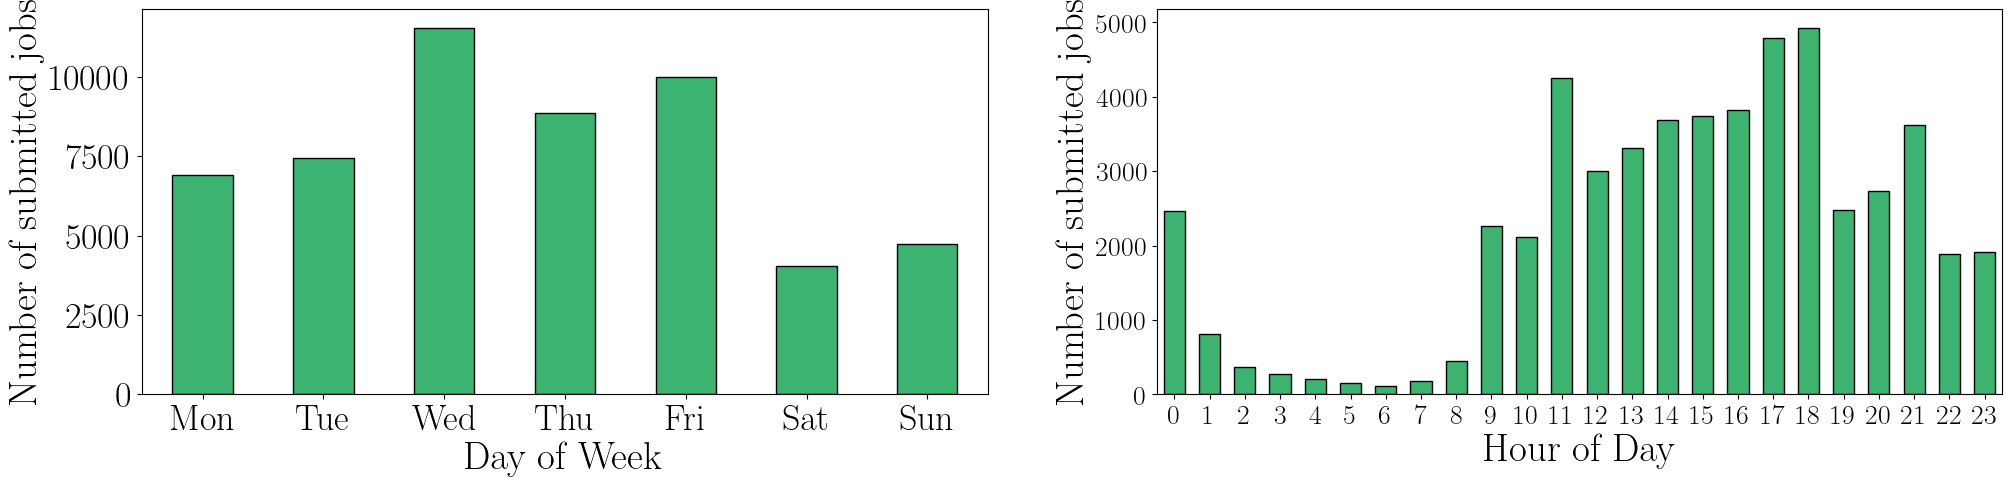

In [32]:
# fig-course-submissions-week-and-day
fig, axes = plt.subplots(figsize = (24, 5), nrows = 1, ncols = 2)

x_vals = np.arange(course_data["submit_hour_of_day"].nunique())
y_vals = course_data["submit_hour_of_day"].value_counts(sort=False).sort_index()
axes[1].bar(x_vals, y_vals, edgecolor='black', capsize=2, width = 0.6, color = 'mediumseagreen')
axes[1].set_ylim(bottom=0, top=None)
axes[1].set_xlim(-0.5,23.5)
axes[1].set_xlabel("Hour of Day",  fontsize=28)
axes[1].set_ylabel("Number of submitted jobs", fontsize=28)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='minor', labelsize=20)
axes[1].xaxis.set_major_locator(MultipleLocator(1))

x_vals = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
y_vals = course_data["submit_day_of_week"].value_counts(sort=False).sort_index()
axes[0].bar(x_vals, y_vals, edgecolor='black', capsize=2, width = 0.5, color = 'mediumseagreen')
axes[0].set_ylim(bottom=0, top=None)
axes[0].set_xlim(-0.5,6.5)
axes[0].set_xlabel("Day of Week", fontsize=28)
axes[0].set_ylabel("Number of submitted jobs", fontsize=28)
axes[0].tick_params(axis='both', which='major', labelsize=26)
axes[0].tick_params(axis='both', which='minor', labelsize=26)
axes[0].xaxis.set_major_locator(MultipleLocator(1))

plt.show()
fig.savefig('fig-cs-submissions-week-and-day.pdf', bbox_inches = 'tight')

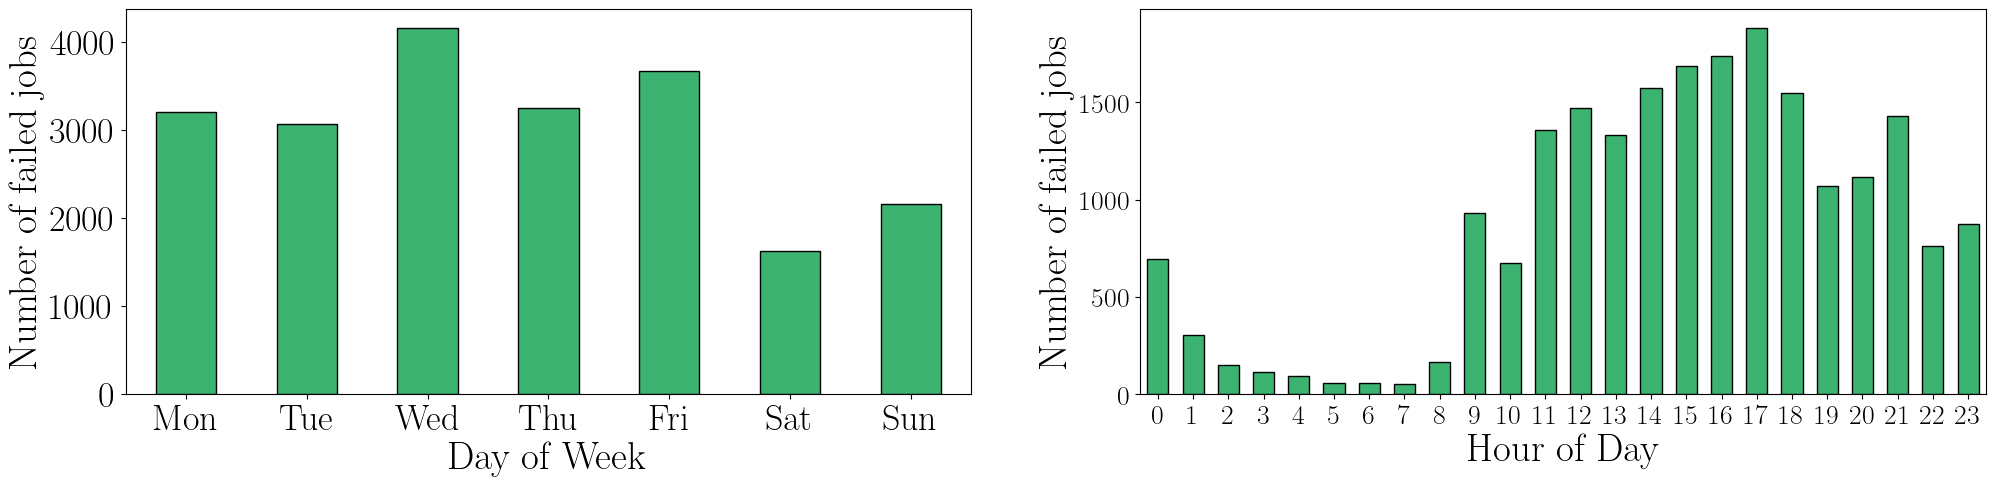

In [33]:
# fig-course-failures-week-and-day
fig, axes = plt.subplots(figsize = (24, 5), nrows = 1, ncols = 2)

x_vals = np.arange(cs_failed["submit_hour_of_day"].nunique())
y_vals = cs_failed["submit_hour_of_day"].value_counts(sort=False).sort_index()
axes[1].bar(x_vals, y_vals, edgecolor='black', capsize=2, width = 0.6, color = 'mediumseagreen')
axes[1].set_ylim(bottom=0, top=None)
axes[1].set_xlim(-0.5,23.5)
axes[1].set_xlabel("Hour of Day",  fontsize=28)
axes[1].set_ylabel("Number of failed jobs", fontsize=28)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='minor', labelsize=20)
axes[1].xaxis.set_major_locator(MultipleLocator(1))

x_vals = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
y_vals = cs_failed["submit_day_of_week"].value_counts(sort=False).sort_index()
axes[0].bar(x_vals, y_vals, edgecolor='black', capsize=2, width = 0.5, color = 'mediumseagreen')
axes[0].set_ylim(bottom=0, top=None)
axes[0].set_xlim(-0.5,6.5)
axes[0].set_xlabel("Day of Week", fontsize=28)
axes[0].set_ylabel("Number of failed jobs", fontsize=28)
axes[0].tick_params(axis='both', which='major', labelsize=26)
axes[0].tick_params(axis='both', which='minor', labelsize=26)
axes[0].xaxis.set_major_locator(MultipleLocator(1))

plt.show()
fig.savefig('fig-cs-failures-week-and-day.pdf', bbox_inches = 'tight')


## Plots for Presentation

NameError: name 'normalize_to_100' is not defined

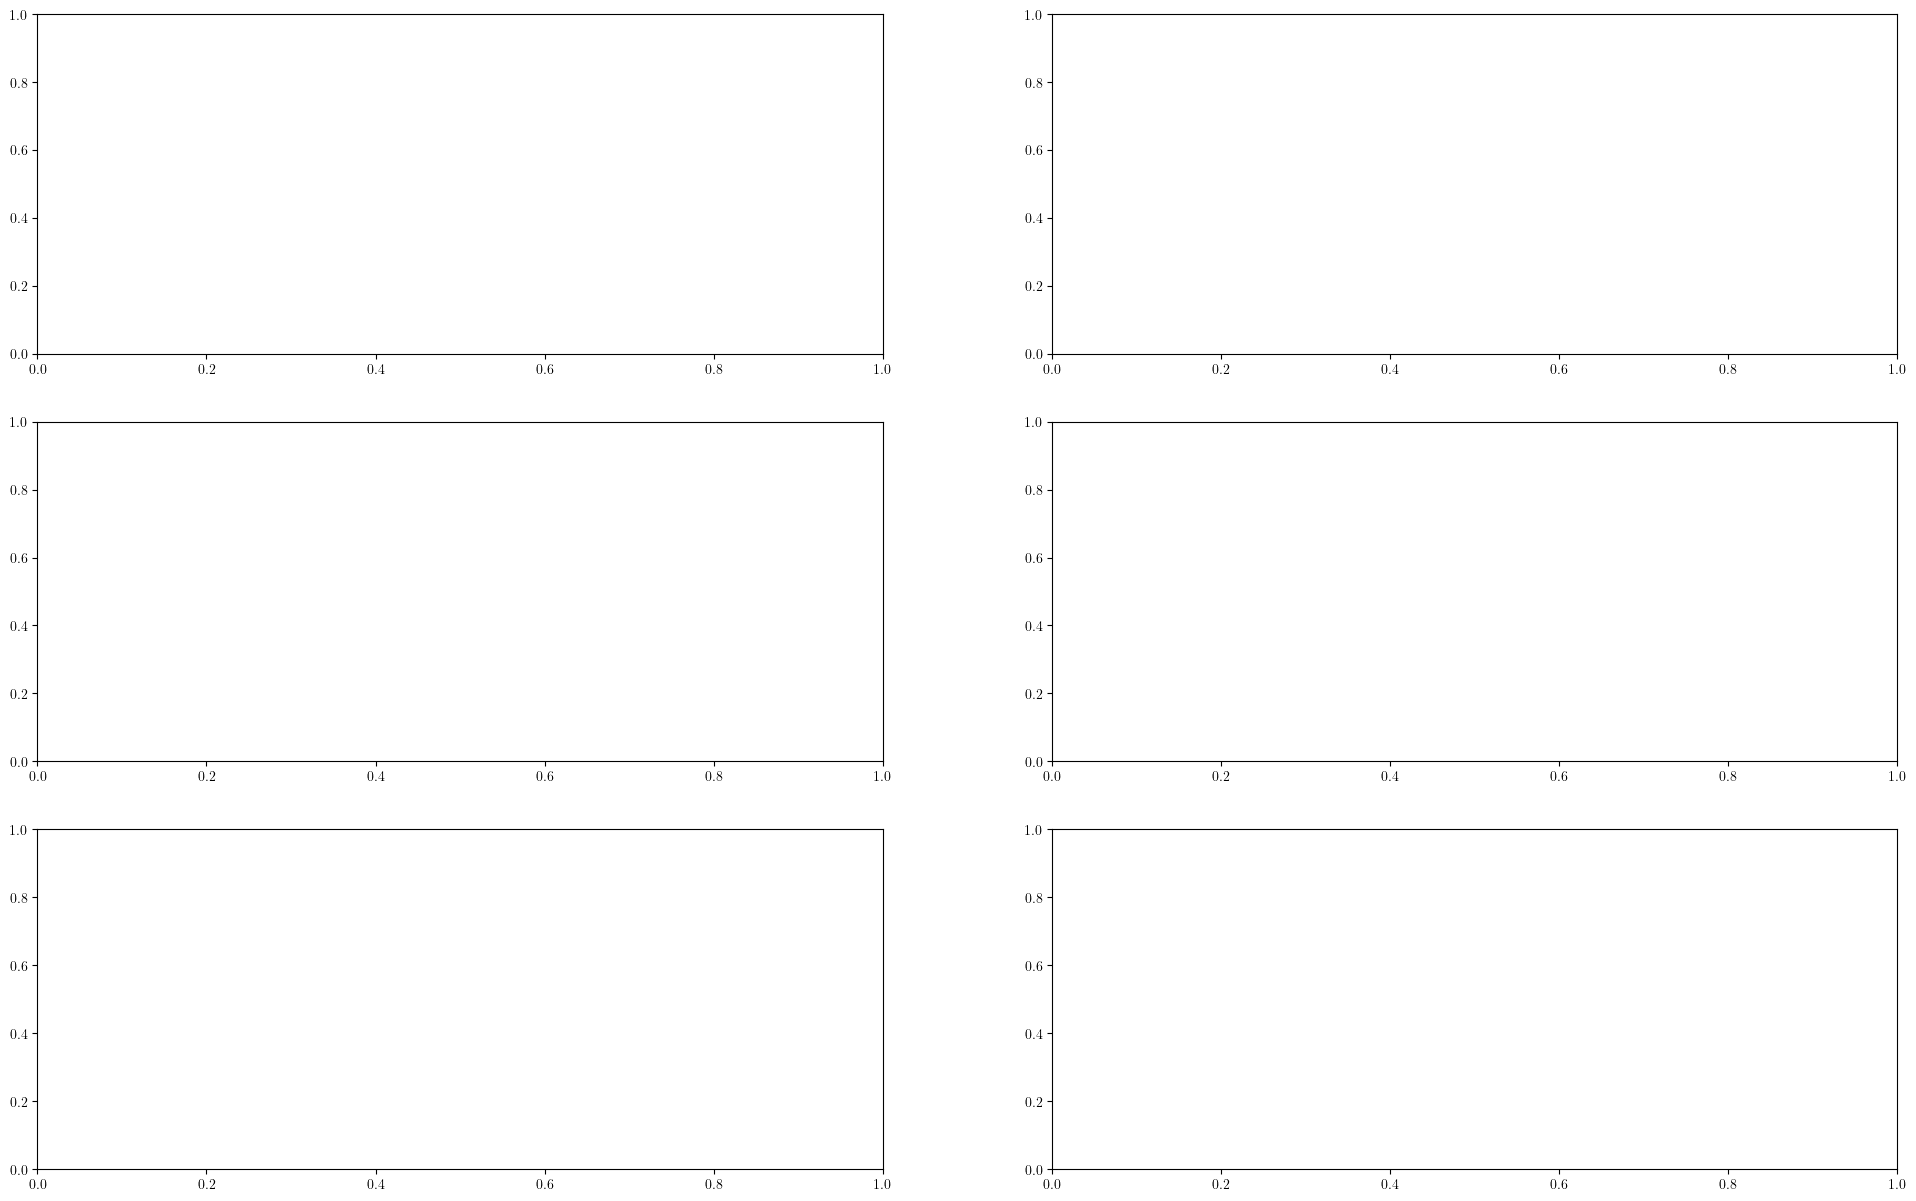

In [34]:
# Submissions
# Save as png

# Create a single figure for all subplots
fig, axes = plt.subplots(figsize=(24, 15), nrows=3, ncols=2)

# Create diptychs for generic, ML, and course data
for data, ax_row, color in zip([generic_data, ml_data, course_data],
                               axes,
                               ['lightcoral', 'steelblue', 'mediumseagreen']):

    # Hour of Day plot
    x_vals = np.arange(data["submit_hour_of_day"].nunique())
    y_vals_hour = data["submit_hour_of_day"].value_counts(sort=False).sort_index()
    ax_row[1].bar(x_vals, normalize_to_100(y_vals_hour), edgecolor='black', capsize=5, width=0.6, color=color)
    ax_row[1].set_ylim(bottom=0, top=100)
    ax_row[1].set_xlim(-0.5, 23.5)
    ax_row[1].set_xlabel("Hour of day", fontsize=32, fontweight='bold')
#     ax_row[1].set_ylabel("Percentage of submitted jobs", fontsize=12, fontweight='bold')
    ax_row[1].tick_params(axis='both', which='major', labelsize=30)
    ax_row[1].xaxis.set_major_locator(MultipleLocator(1))

    # Day of Week plot
    x_vals = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    y_vals_day = data["submit_day_of_week"].value_counts(sort=False).sort_index()
    ax_row[0].bar(x_vals, normalize_to_100(y_vals_day), edgecolor='black', capsize=5, width=0.6, color=color)
    ax_row[0].set_ylim(bottom=0, top=100)
    ax_row[0].set_xlim(-0.5, 6.5)
    ax_row[0].set_xlabel("Day of week", fontsize=32, fontweight='bold')
    ax_row[0].set_ylabel("Percentages", fontsize=28, fontweight='bold')
    ax_row[0].tick_params(axis='both', which='major', labelsize=30)
#     ax_row[0].tick_params(axis='both', which='minor', labelsize=10)
    ax_row[0].xaxis.set_major_locator(MultipleLocator(1))

plt.tight_layout()

# Save entire figure as a single PNG file with higher resolution (dpi=300)
plt.savefig('pre-fig-sub.png', dpi=300)
plt.close(fig)


In [ ]:
# Failures
# Save as png

# Create a figure with 3 rows and 2 columns to accommodate all subplots
fig, axes = plt.subplots(figsize=(24, 15), nrows=3, ncols=2)

# Create diptychs for generic, ML, and course failure data
for data, ax_row, color in zip([ge_failed, ml_failed, cs_failed], axes, ['lightcoral', 'steelblue', 'mediumseagreen']):
    # Hour of Day plot
    x_vals = np.arange(data["submit_hour_of_day"].nunique())
    y_vals_hour = data["submit_hour_of_day"].value_counts(sort=False).sort_index()
    ax_row[1].bar(x_vals, normalize_to_100(y_vals_hour), edgecolor='black', capsize=5, width=0.6, color=color)
    ax_row[1].set_ylim(bottom=0, top=100)
    ax_row[1].set_xlim(-0.5, 23.5)
    ax_row[1].set_xlabel("Hour of day", fontsize=32, fontweight='bold')
#     ax_row[1].set_ylabel("Percentage of failed jobs", fontsize=20, fontweight='bold')
    ax_row[1].tick_params(axis='both', which='major', labelsize=30)
    ax_row[1].xaxis.set_major_locator(MultipleLocator(1))

    # Day of Week plot
    x_vals = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    y_vals_day = data["submit_day_of_week"].value_counts(sort=False).sort_index()
    ax_row[0].bar(x_vals, normalize_to_100(y_vals_day), edgecolor='black', capsize=5, width=0.6, color=color)
    ax_row[0].set_ylim(bottom=0, top=100)
    ax_row[0].set_xlim(-0.5, 6.5)
    ax_row[0].set_xlabel("Day of week", fontsize=32, fontweight='bold')
    ax_row[0].set_ylabel("Percentages", fontsize=28, fontweight='bold')
#     ax_row[0].tick_params(axis='both', which='major', labelsize=16)
    ax_row[0].tick_params(axis='both', which='major', labelsize=30)
    ax_row[0].xaxis.set_major_locator(MultipleLocator(1))

plt.tight_layout()

# Save the figure with all subplots as a single PNG file with higher resolution (dpi=300)
plt.savefig('pre-fig-fail.png', dpi=300)
plt.close()


# Time Correlation Analysis

## Autocorrelation

In [ ]:
ml_failed['Submit'] = pd.to_datetime(ml_failed['Submit'], format = '%Y-%m-%d %H:%M:%S')
ml_failed['day'] = ml_failed['Submit'].dt.date
ml_failed['month'] = ml_failed['day'].apply(lambda x: str(x)[:7])
ml_failed["hour_of_day"] = ml_failed["Submit"].dt.hour


In [ ]:
def dt_to_week(df):
    l = []
    for i in df['Submit']:
        j = i.strftime("%W")
        l.append(j)
    df['week'] = l
    return df

def dt_to_day(df):
    l = []
    for i in df['Submit']:
        j = i.strftime("%j")
        j = int(j)
        l.append(j)
    df['day'] = l
    return df

ml_failed = dt_to_week(ml_failed)
ml_failed = dt_to_day(ml_failed)
ml_failed["hour"] = (ml_failed["day"]-1)*24 + ml_failed["hour_of_day"]


In [ ]:
# df_week
group = ml_failed.groupby(["week"])
failL, iL = [], []
for i in group:
    a = i[1]['State'].value_counts().to_frame()
    fail = a.loc['FAILED','State']
    failL.append(fail)
    iL.append(i[0])

df_week = pd.DataFrame({
    "week": iL,
    "failed": failL
})

# df_day
group = ml_failed.groupby(["day"])
failL, iL = [], []
for i in group:
    a = i[1]['State'].value_counts().to_frame()
    fail = a.loc['FAILED','State']
    failL.append(fail)
    iL.append(i[0])

df_day = pd.DataFrame({
    "day": iL,
    "failed": failL
})

# df_hour
group = ml_failed.groupby(["hour"])
failL, iL = [], []
for i in group:
    a = i[1]['State'].value_counts().to_frame()
    fail = a.loc['FAILED','State']
    failL.append(fail)
    iL.append(i[0])

df_hour = pd.DataFrame({
    "hour": iL,
    "failed": failL
})

In [ ]:
# df_hour
ml_failed["hour"] = (ml_failed["day"]-1)*24 + ml_failed["hour_of_day"]
ml_failed["hour"]

In [ ]:
fig = plt.figure(figsize=(8, 5))
x = range(1,len(df_week)+1)
y = df_week['failed']
plt.xlabel('Week [w]', fontsize=30)
plt.ylabel('Failures per week', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.yscale("log")
plt.bar(x,y,color='steelblue',width=0.3)

fig.savefig('fig-failures-per-week.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
df_week['normalize'] = (df_week['failed']-df_week['failed'].min())/(df_week['failed'].max()-df_week['failed'].min())
df_week.head()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation
plt.rc("figure", figsize=(8,6))
plot_acf(df_week['failed'], lags=30)
plt.ylim(0,1)
# plt.xlim((-1,500))
plt.xlabel('Lags [w]', fontsize=28)
plt.ylabel('Autocorrelation', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# plt.yscale("log")
plt.title('',fontsize=0)
plt.tight_layout()
plt.savefig('fig-lags-week.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 5))
x = range(1,len(df_day)+1)
y = df_day['failed']
plt.xlabel('Day [d]', fontsize=30)
plt.ylabel('Failures per day', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.yscale("log")
plt.bar(x,y,color='steelblue',width=1)
fig.savefig('fig-failures-per-day.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
plt.rc("figure", figsize=(8,6))
plot_acf(df_day['failed'], lags=30)
plt.ylim(0,1)
# plt.xlim((-1,500))
plt.xlabel('Lags [d]', fontsize=28)
plt.ylabel('Autocorrelation', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# plt.yscale("log")
plt.title('',fontsize=0)
plt.tight_layout()
plt.savefig('fig-lags-day.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 5))
x = range(1,len(df_hour)+1)
y = df_hour['failed']
plt.xlabel('Hour [h]', fontsize=30)
plt.ylabel('Failures per hour', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.yscale("log")
plt.bar(x,y,color='steelblue',width=1)
fig.savefig('fig-failures-per-hour.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
plt.rc("figure", figsize=(8,6))
plot_acf(df_hour['failed'], lags=30,color='steelblue')
plt.ylim(0,1)
# plt.xlim((-1,500))
plt.xlabel('Lags [h]', fontsize=28)
plt.ylabel('Autocorrelation', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# plt.yscale("log")
plt.title('',fontsize=0)
plt.tight_layout()
plt.savefig('fig-lags-hour.pdf', bbox_inches = 'tight')
plt.show()

## Seasonality and Trend

In [ ]:
group_date_failed = slurm_data[slurm_data["State"] == "FAILED"]
group_date_failed["submit_date"] = pd.to_datetime(group_date_failed["submit_date"], utc = True)

group_date_failed = group_date_failed.set_index("submit_date")
group_date_failed = group_date_failed.groupby([group_date_failed.index.date, "node_type"]).count().unstack(1)
datelist = list(group_date_failed.index.values)

failurelist = group_date_failed["JobID"].fillna(0)
failurelist.columns = ['ml', 'generic', 'course']

In [ ]:
# Trends, seasonality, and noise
# Generic

plt.rcParams['figure.figsize'] = 11, 9
decomposed_job_submissions = sm.tsa.seasonal_decompose(failurelist['generic'], period = 7) # The frequncy is annual
figure = decomposed_job_submissions.plot()

plt.savefig('fig-trend-failure-ge.pdf', bbox_inches = 'tight')
plt.show()


In [ ]:
# Trends, seasonality, and noise
# ML

plt.rcParams['figure.figsize'] = 11, 9
decomposed_job_submissions = sm.tsa.seasonal_decompose(failurelist['ml'] + failurelist['course'], period = 7) # The frequncy is annual
figure = decomposed_job_submissions.plot()

plt.savefig('fig-trend-failure-ml.pdf', bbox_inches = 'tight')
plt.show()
